In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\kumar\Downloads\UniversalBank.csv")
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [2]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [3]:
df=df.drop(['ID','ZIP Code'],axis=1)
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

<Axes: title={'center': 'showing the correlation using heatmap'}>

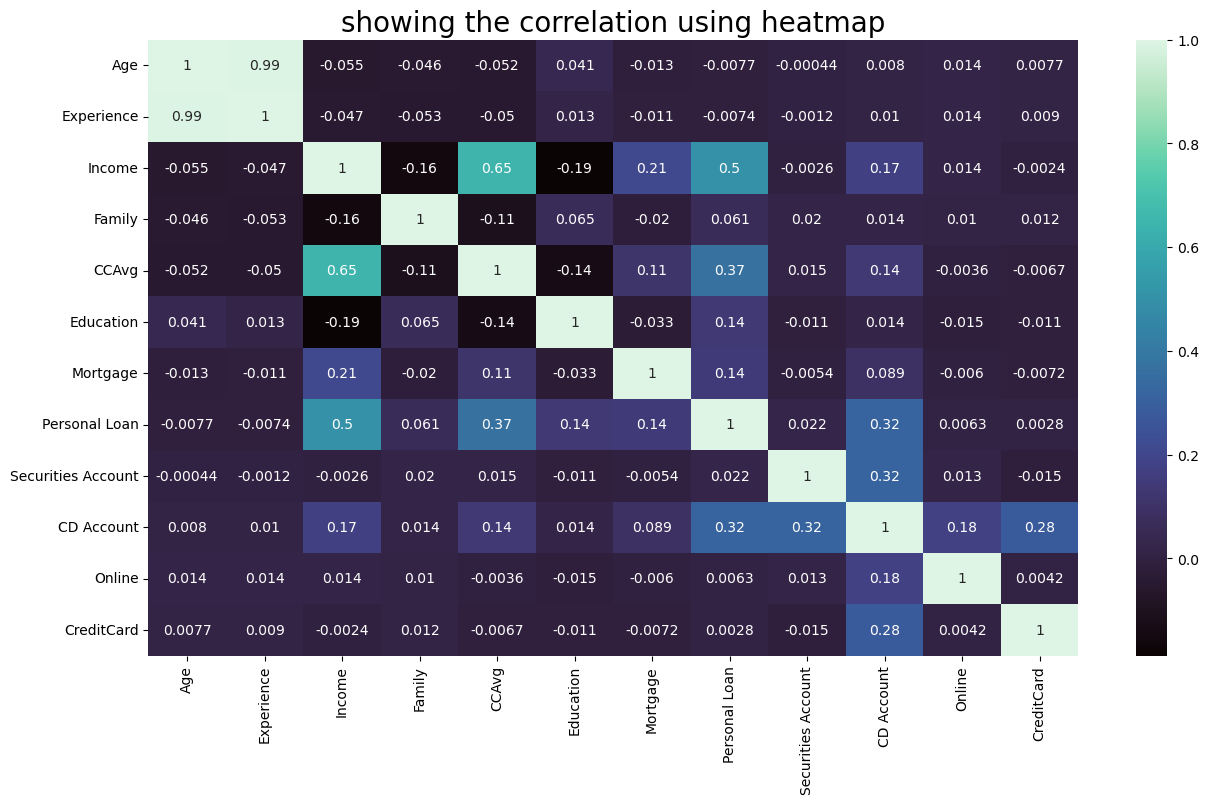

In [4]:
plt.figure(figsize=(15,8))
plt.title('showing the correlation using heatmap',fontsize=20)
sns.heatmap(df.corr(),annot=True,cmap="mako")

In [5]:
zero_cc=df[df.CreditCard==0]
zero_cc.shape

(3530, 12)

In [6]:
one_cc=df[df.CreditCard==1]
one_cc.shape

(1470, 12)

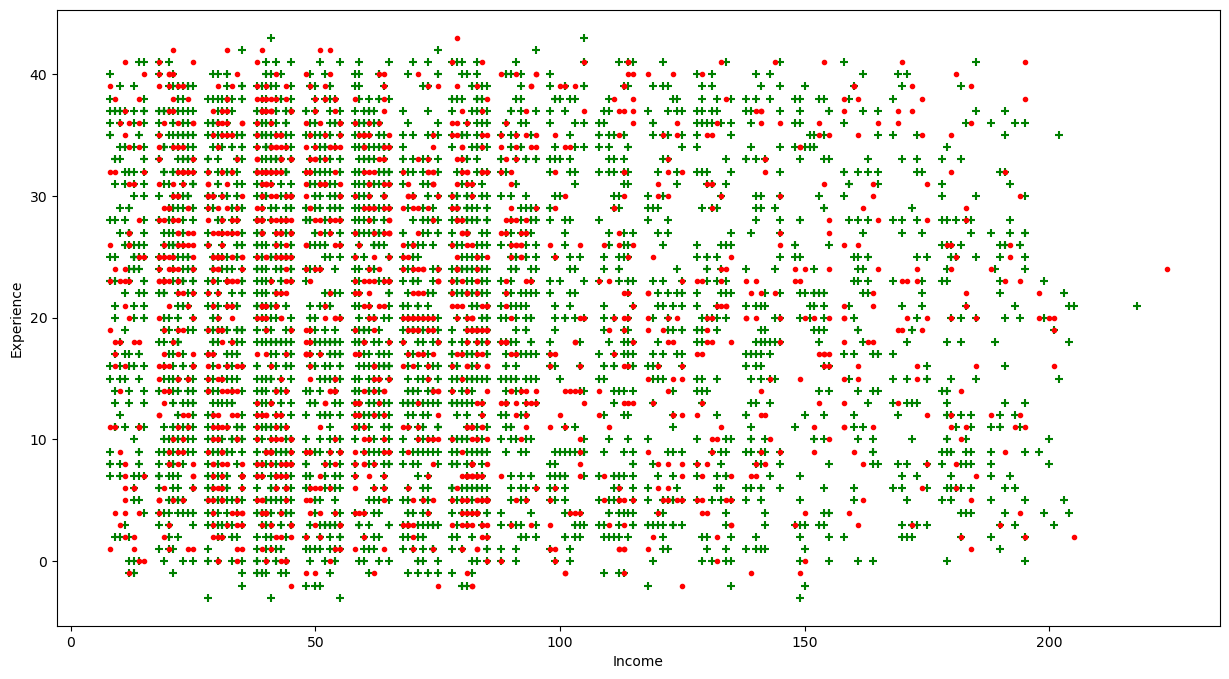

In [7]:
plt.figure(figsize=(15,8))
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_cc['Income'],zero_cc['Experience'],color='green',marker='+')
plt.scatter(one_cc['Income'],one_cc['Experience'],color='red',marker='.')

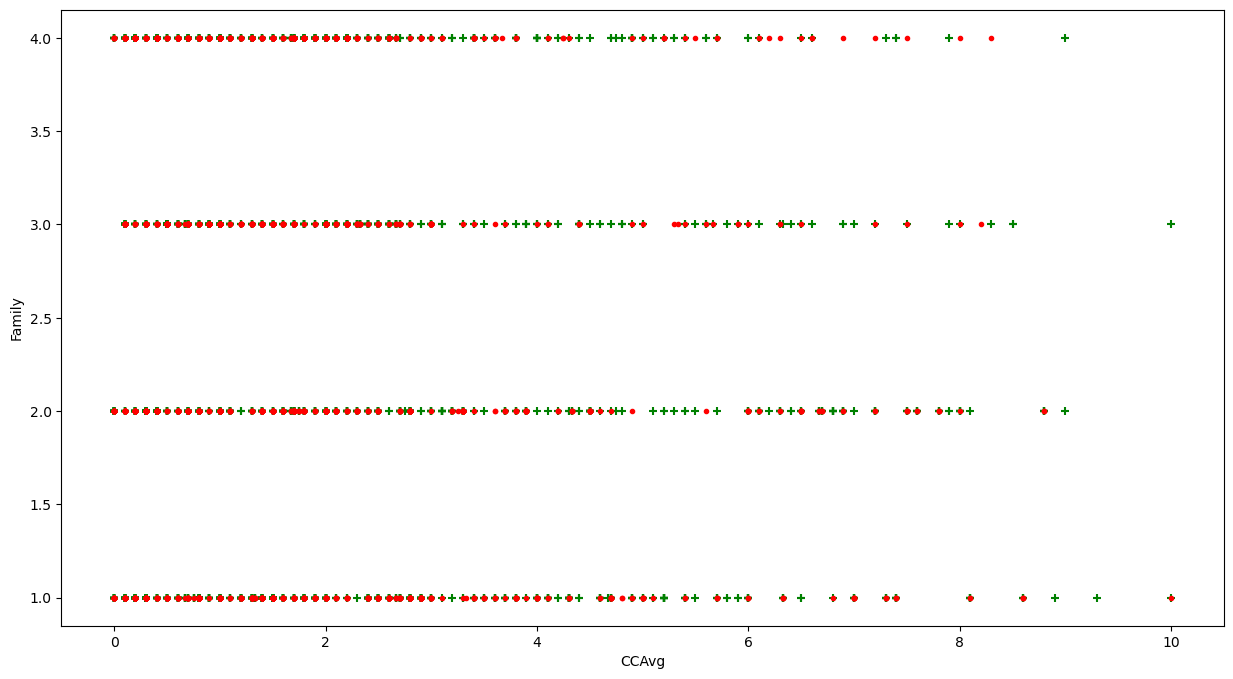

In [8]:
plt.figure(figsize=(15,8))
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_cc['CCAvg'],zero_cc['Family'],color='green',marker='+')
plt.scatter(one_cc['CCAvg'],one_cc['Family'],color='red',marker='.')

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
x = df.drop(['CreditCard'], axis=1)  
y = df['CreditCard']
scaler_x = StandardScaler()
x = scaler_x.fit_transform(x)
print(x.shape)
print(y.shape)

(5000, 11)
(5000,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)
svc = SVC()
model = svc.fit(xtrain, ytrain)
predictions = svc.predict(xtest)
accuracy= accuracy_score(predictions,ytest)
print(accuracy)

0.76


In [13]:
prediction=model.predict([["Age"==25,'Experience'==1,'Income'==49,'Family'==4,'CCAvg'==1.6,'Education'==1,'Mortgage'==0,'Personal Loan'==0,'Securities Account'==1,'CD Account'==0,'Online'==0]])
print(prediction)

[0]
